In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
excel_path = r"C:\Users\Charbel\Desktop\Data Science X5\Data Collection - Registration App Final2.xlsx"
excel_file = pd.ExcelFile(excel_path)
sheets_dict = {sheet_name: excel_file.parse(sheet_name) for sheet_name in excel_file.sheet_names}

# Clean DataFrames: drop duplicates and empty rows
cleaned_dfs = {
    name: df.drop_duplicates().dropna(how='all')
    for name, df in sheets_dict.items()
}

# 1. Summary stats
for name, df in cleaned_dfs.items():
    print(f"\n{'='*40}\nSummary of '{name}'\n{'='*40}")
    print(df.describe(include='all'))

# 2. Null values
print("\nNull values by column:")
for name, df in cleaned_dfs.items():
    nulls = df.isnull().sum()
    if nulls.sum() > 0:
        print(f"\n{name}:\n{nulls[nulls > 0]}")



Summary of 'Payment_Method'
              ID   TYPE                      DETAILS           UPDATED_AT  \
count   2.000000      2                            2                    2   
unique       NaN      2                            2                  NaN   
top          NaN  whish  Whish App/Transfer in Store                  NaN   
freq         NaN      1                            1                  NaN   
mean    1.500000    NaN                          NaN  2025-04-12 17:00:00   
min     1.000000    NaN                          NaN  2025-04-12 17:00:00   
25%     1.250000    NaN                          NaN  2025-04-12 17:00:00   
50%     1.500000    NaN                          NaN  2025-04-12 17:00:00   
75%     1.750000    NaN                          NaN  2025-04-12 17:00:00   
max     2.000000    NaN                          NaN  2025-04-12 17:00:00   
std     0.707107    NaN                          NaN                  NaN   

                 CREATED_AT  
count           

In [1]:
# Data Correlation Study after i made views in sql lite database 

In [11]:
import sqlite3
import pandas as pd

# Database connection
db_path = r"C:\Users\Charbel\Desktop\Data Science X5\Registration App.db"
conn = sqlite3.connect(db_path)

# Load views
views = ['CORRELATION_STUDY_USER_DEMOGRAPHICS', 'CORRELATION_STUDY_USER_PAYMENT']
CORRELATION_USER_DEMO = pd.read_sql_query(f"SELECT * FROM {views[0]}", conn)
CORRELATION_USER_PAY = pd.read_sql_query(f"SELECT * FROM {views[1]}", conn) 

In [12]:
CORRELATION_USER_DEMO_NUM = CORRELATION_USER_DEMO.select_dtypes(include='number')
CORRELATION_USER_PAY_NUM = CORRELATION_USER_PAY.select_dtypes(include='number')

# === Compute correlation matrices ===
USER_DEMOGRAPHICS_CORR = CORRELATION_USER_DEMO_NUM.corr()
USER_PAYMENT_CORR = CORRELATION_USER_PAY_NUM.corr()

In [9]:
USER_DEMOGRAPHICS_CORR = CORRELATION_STUDY_USER_DEMOGRAPHICS_ENCODED.corr()
USER_PAYMENT_CORR = CORRELATION_STUDY_USER_PAYMENT_ENCODED.corr()


In [10]:
print(USER_DEMOGRAPHICS_CORR)
print(USER_PAYMENT_CORR)


                                                    BATCH_ID  \
BATCH_ID                                            1.000000   
BATCH_XPERTBOT 2                                   -0.493815   
BATCH_XPERTBOT 3                                   -0.282311   
BATCH_XPERTBOT 4                                    0.028134   
BATCH_XPERTBOT 5                                    0.346662   
...                                                      ...   
INSTITUTION_NAME_University of the Holy Spirit ...  0.018997   
INSTITUTION_NAME_University of the Mediterranean    0.037575   
INSTITUTION_NAME_University of the Middle East     -0.017251   
INSTITUTION_NAME_University of the People           0.000895   
STATUS_incomplete                                   0.224515   

                                                    BATCH_XPERTBOT 2  \
BATCH_ID                                                   -0.493815   
BATCH_XPERTBOT 2                                            1.000000   
BATCH_XPERTBOT 

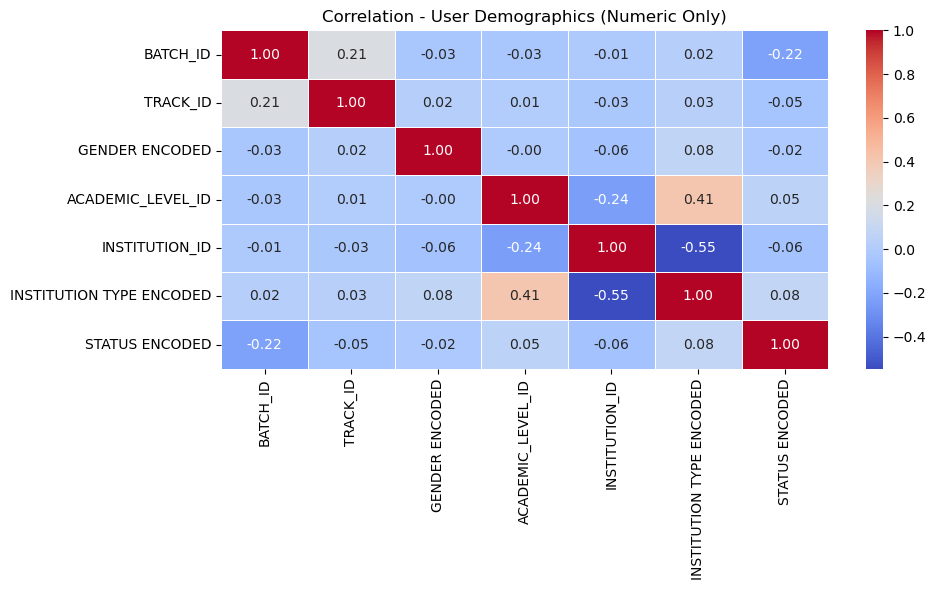

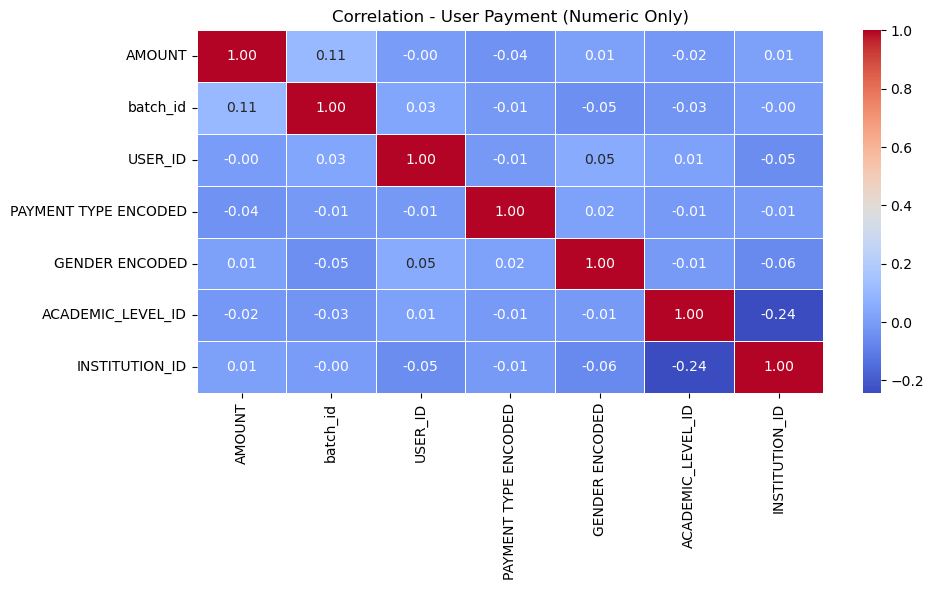

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_corr_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_corr_heatmap(USER_DEMOGRAPHICS_CORR, "Correlation - User Demographics (Numeric Only)")
plot_corr_heatmap(USER_PAYMENT_CORR, "Correlation - User Payment (Numeric Only)")

In [ ]:
# conclusion: low - medium correlation is observed 
# this is probably due to the data being random data generated by faker and not actual data.